In [42]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
import matplotlib.pyplot as plt

In [47]:
class MyDataSet(Dataset):
    def __init__(self, features_path, labels_path, trans=None, target_trans=None):
        self.features = np.load(features_path, allow_pickle=True)
        self.labels = np.load(labels_path, allow_pickle=True)
        self.trans = trans
        self.target_trans = target_trans

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, item):
        feature, label = self.features[item], self.labels[item]
        if self.trans:
            feature = self.trans(feature)
        if self.target_trans:
            label = self.target_trans(label)
        return feature, label


def my_trans(x):
    return torch.Tensor(x)

train_set = MyDataSet('../../Train/train_features.npy', '../../Train/train_labels.npy',
                      trans=my_trans, target_trans=my_trans)
test_set = MyDataSet('../../Train/test_features.npy', '../../Train/test_labels.npy',
                      trans=my_trans, target_trans=my_trans)
train_loader = DataLoader(train_set, batch_size=4)
test_loader = DataLoader(test_set, batch_size=4)

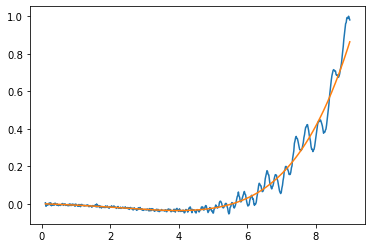

In [52]:
plt.figure()
feature, label = train_set[11]
x = np.linspace(0.1, 9, 512)
plt.plot(x, feature)
plt.plot(x, np.poly1d([*label, 0])(x/9))
plt.show()

In [ ]:
class LK(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(512, 50)
        self.l2 = nn.Linear(50, )

